<a href="https://colab.research.google.com/github/ardilapablo/APRENDIZAJE_AUTOMATICO_23_24/blob/main/G1_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Airbnb

# Regresión Logística

Los modelos de regresión lineales del tipo:
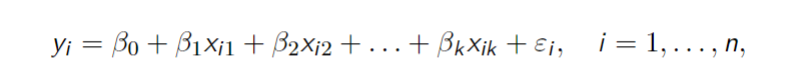

son muy útiles en una gran variedad de escenarios, pero no son los más adecuado en problemas en los cuales el rango de Y es restringido, por ejemplo en casos en los que la Y tenga que estar entre 0 y 1 representando asi una probabilidad.

En esencia lo que hace la regresión logistica es utilizar la función logística (sigmoide) para transformar la salida de una combinación lineal de las variables independientes en una probabilidad que se encuentra entre 0 y 1.

Lo que tendremos ahora es un predictor lineal:

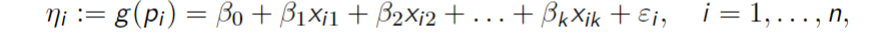


dentro de:


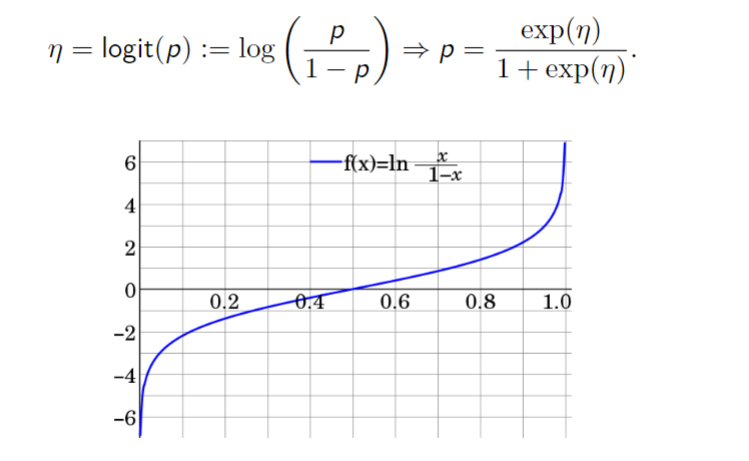

Para encotrar los parametros beta se tiene que resolver el problema de optimización:

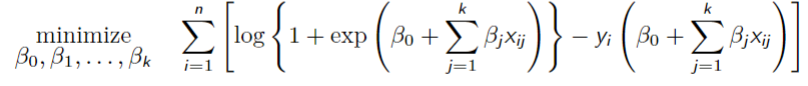

En regresión lineal, las betas (coeficientes) se interpretan como el cambio esperado en la variable dependiente Y por cada unidad de cambio en la variable independiente X, manteniendo constantes todas las demás variables. Por ejemplo, si beta_1 es 2, un aumento de una unidad en X_1 se espera que incremente Y en 2 unidades. La relación entre las variables es aditiva y directa, lo que significa que el efecto de X sobre Y es constante.

En regresión logística, las betas se interpretan de manera diferente debido a la naturaleza de la variable dependiente, que es una probabilidad que se encuentra entre 0 y 1. Aquí, las betas representan el cambio en el logaritmo de las probabilidades (log-odds) de que el resultado sea 1 por cada unidad de cambio en la variable independiente. Para interpretar las betas en términos más intuitivos, a menudo se utilizan las razones de probabilidades (odds ratios). Por ejemplo, si beta_1 es 0.5, un aumento de una unidad en X_1 se asocia con un incremento de e^0.5 en las probabilidades de que el resultado sea 1. La relación es exponencial, lo que significa que el efecto de X sobre la probabilidad no es constante, sino que depende del valor actual de  X.

Debemos tener cuidado y tomar en cuenta tambien:

Tamaño de la Muestra: La regresión logística requiere un tamaño de muestra suficientemente grande para obtener estimaciones fiables. Con muestras pequeñas, los coeficientes pueden estar sesgados y la capacidad de generalización de los resultados puede verse comprometida.

--Datos Desbalanceados: La regresión logística puede tener dificultades para manejar conjuntos de datos altamente desbalanceados, donde una de las clases en la variable dependiente es mucho más frecuente que la otra. Esto puede llevar a un modelo que predice casi siempre la clase mayoritaria, ignorando la minoritaria.

-Validación del Modelo: Es crucial validar el modelo utilizando técnicas como la validación cruzada y evaluar su desempeño mediante métricas adecuadas como la curva ROC, el AUC, precisión, sensibilidad y especificidad.




## Importación de las librerías

In [ ]:
from google.colab import drive
import zipfile
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import ast
import pandas as pd
import ast
import pandas as pd
import ast
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm


## Tratamiento de los datos:

Comenzaremos cargando la base de datos de nuestro drive

In [ ]:
drive.mount('/content/drive')

#Ruta al archivo zip y la ruta de extracción
zip_file_path = '/content/drive/My Drive/Airbnb.zip'  #Ruta a tu archivo en Google Drive
extract_path = '/content/extracted_files/'  #Ruta donde se extraerán los archivos

#Crear una carpeta de extracción si no existe
os.makedirs(extract_path, exist_ok=True)

#Descomprimir el archivo zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

#Listamos los archivos extraídos
extracted_files = os.listdir(extract_path)
print("Archivos extraídos:", extracted_files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivos extraídos: ['California_airbnb.csv']


In [ ]:
#Cargamos el archivo CSV en un DataFrame de pandas
csv_file_path = os.path.join(extract_path, 'California_airbnb.csv')
data = pd.read_csv(csv_file_path)

#Mostramos las primeras filas del DataFrame
print(data.head())

         Date     id       scrape_id                          name  host_id  \
0  2023-12-10    109  20231203160142         Condo in Culver City       521   
1  2023-12-10   2708  20231203160142   Rental unit in Los Angeles      3008   
2  2023-12-10   2732  20231203160142  Rental unit in Santa Monica      3041   
3  2023-12-10   2864  20231203160142    Rental unit in Bellflower      3207   
4  2023-12-10  63416  20231203160142            Home in Hollywood    309512   

   host_since host_response_time  host_response_rate  host_acceptance_rate  \
0  2008-06-27                NaN                 NaN                  50.0   
1  2008-09-16                NaN                 NaN                 100.0   
2  2008-09-17     within an hour               100.0                  42.0   
3  2008-09-25                NaN                 NaN                   NaN   
4  2010-12-04     within an hour               100.0                  96.0   

   host_is_superhost  ...  calculated_host_listings_coun

Comenzamos por tratar todas las variables de letras como posibles categóricas. Para ello, empezaremos por ver los valores únicos de cada atributo con el fin de identificar posibles valores inconsistentes  y entender la variedad de los datos.

In [ ]:
#Obtenemos valores únicos y contamos el número de valores únicos en cada columna especificada
host_city_unique = data['host_city'].unique()
amenities_unique = data['amenities'].unique()
bathrooms_text_unique = data['bathrooms_text'].unique()
host_response_time_unique = data['host_response_time'].unique()

print(f"Valores únicos en 'host_city' ({len(host_city_unique)}):")
print(host_city_unique)

print(f"\nValores únicos en 'amenities' ({len(amenities_unique)}):")
print(amenities_unique)

print(f"\nValores únicos en 'bathrooms_text' ({len(bathrooms_text_unique)}):")
print(bathrooms_text_unique)

print(f"\nValores únicos en 'host_response_time' ({len(host_response_time_unique)}):")
print(host_response_time_unique)


Valores únicos en 'host_city' (1266):
['San Francisco' 'Los Angeles' 'Santa Monica' ... 'Hollister' 'Funchal'
 'Livingston']

Valores únicos en 'amenities' (209271):
['["Iron", "Cleaning products", "Microwave", "Fast wifi \\u2013 411 Mbps", "Laundromat nearby", "Luggage dropoff allowed", "HDTV with standard cable, Netflix", "Wine glasses", "Bed linens", "Children\\u2019s dinnerware", "Bay view", "Heating", "Smoke alarm", "Ceiling fan", "Books and reading material", "Baking sheet", "Clothing storage: closet and dresser", "Coffee maker", "Dishes and silverware", "Carbon monoxide alarm", "Hair dryer", "Refrigerator", "First aid kit", "Toaster", "Private entrance", "Private patio or balcony", "Fire extinguisher", "Kitchen", "Outdoor furniture", "Shampoo", "City skyline view", "Board games", "Essentials", "Dining table", "Coffee", "Extra pillows and blankets", "Body soap", "Babysitter recommendations", "Freezer", "Oven", "Bathtub", "Cooking basics", "Free street parking", "Hangers", "Hot wa

Amenities es lista de listas, por lo que vamos a cambiarlo a una lista normal con el fin de facilitar el análisis de cada amenity.

In [ ]:
#Reemplazamos los NaN en 'amenities' con listas vacías
data['amenities'] = data['amenities'].fillna('[]')

#Convertimos la columna 'amenities' de cadenas de texto a listas de Python
data['amenities'] = data['amenities'].apply(lambda x: ast.literal_eval(x))

#Creamos un conjunto para almacenar las amenities únicas
unique_amenities = set()

#Iteramos sobre cada fila y añadimos las amenities al conjunto
for amenities_list in data['amenities']:
    unique_amenities.update(amenities_list)

#Convertimos el conjunto a una lista y las ordenamos
unique_amenities = sorted(list(unique_amenities))

print(f"Total de amenities únicas: {len(unique_amenities)}")
print(unique_amenities)



Total de amenities únicas: 20239
['\t Brookstone® Big Blue Portable Bluetooth® Go Speaker sound system with Bluetooth and aux', '  Kenmore3  refrigerator', '  Whirlpool refrigerator', ' ..... oven', ' 2 burner ceamic hot plate stainless steel electric stove', ' 6-burner GE Monogram stovetop stainless steel electric stove', ' A Selection of Quality Conditioner conditioner', ' Alexa  Echo Dot  Voice assistant .   sound  Speakers. . Bluetooth sound system', ' Avanti electric stove', ' Bluetooth speaker Bluetooth sound system', ' Bose sound system with Bluetooth and aux', ' Breville  stainless steel oven', ' Full Size Refrigerator refrigerator', ' Ginger Lily Farms  conditioner', ' Ginger Lily Farms Botanicals Nourishing Body Wash, Island Tranquility, 100% Vegan & Cruelty-Free, Green Tea & Lemongrass Scent body soap', ' Ginger Lily Farms Botanicals Nourishing Conditioner, 100% Vegan & Cruelty-Free,  conditioner', ' Ginger Lily Farms Botanicals Nourishing Shampoo, Island Tranquility, 100% V

Reducimos las categorías para hacerlo más sencillo y no tener tantas amenities y separarlo en unas pocas.

In [ ]:
#Reemplazamos los NaN en 'amenities' con listas vacías
data['amenities'] = data['amenities'].fillna('[]')

#Convertimos la columna 'amenities' de cadenas de texto a listas de Python
data['amenities'] = data['amenities'].apply(lambda x: ast.literal_eval(str(x)))

#Definimos las siguientes categorías
categories = {
    'kitchen': ['refrigerator', 'microwave', 'oven', 'stove', 'coffee maker', 'dishes', 'cooking basics', 'dishwasher', 'freezer', 'kitchen'],
    'entertainment': ['tv', 'sound system', 'cable', 'game console', 'bluetooth'],
    'safety': ['smoke alarm', 'carbon monoxide alarm', 'first aid kit', 'fire extinguisher'],
    'comfort': ['air conditioning', 'heating', 'bed linens', 'towels', 'hangers', 'iron', 'hair dryer'],
    'internet': ['wifi', 'ethernet'],
    'outdoor': ['patio', 'balcony', 'garden', 'bbq grill'],
    'other': ['washer', 'dryer', 'parking', 'elevator', 'gym', 'pool']
}

#Creamos una función para asignar cada amenidad a una categoría
def categorize_amenity(amenity):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in amenity.lower():
                return category
    return 'other'

#Creamos una nueva columna para las nuevas categorías
data['amenities_categories'] = data['amenities'].apply(lambda amenities: [categorize_amenity(amenity) for amenity in amenities])

#Aplanamos la lista de categorías para contar la frecuencia
all_categories = [category for sublist in data['amenities_categories'] for category in sublist]

#Y contamos la frecuencia de cada categoría
category_counts = pd.Series(all_categories).value_counts()

#Mostramos los valores y sus frecuencias
print("Distribución de las categorías de amenities:")
print(category_counts)

#Creamos un mapeo de categorías a números
category_to_num = {category: num for num, category in enumerate(category_counts.index)}

#Transformamos las categorías a valores numéricos
data['amenities_categories_numeric'] = data['amenities_categories'].apply(lambda x: [category_to_num[category] for category in x])

#Eliminamos la columna 'amenities'
data.drop('amenities', axis=1, inplace=True)

#Eliminamos la columna 'amenities_categories'
data.drop('amenities_categories', axis=1, inplace=True)

#Mostramoslas primeras filas para verificar
print(data.head())




Distribución de las categorías de amenities:
other            4563363
kitchen          1457726
comfort          1021378
safety            702660
internet          265515
entertainment     223058
outdoor           199751
Name: count, dtype: int64
         Date     id       scrape_id                          name  host_id  \
0  2023-12-10    109  20231203160142         Condo in Culver City       521   
1  2023-12-10   2708  20231203160142   Rental unit in Los Angeles      3008   
2  2023-12-10   2732  20231203160142  Rental unit in Santa Monica      3041   
3  2023-12-10   2864  20231203160142    Rental unit in Bellflower      3207   
4  2023-12-10  63416  20231203160142            Home in Hollywood    309512   

   host_since host_response_time  host_response_rate  host_acceptance_rate  \
0  2008-06-27                NaN                 NaN                  50.0   
1  2008-09-16                NaN                 NaN                 100.0   
2  2008-09-17     within an hour             

Vemos que ya hemos categorizado la anterior variable amenities. La nueva variable, en cada registro, es un vector donde cada número representa la clase de los artículos del airbnb.

Transformamos la variable bathrooms_text a formato númerico para hacer de ella una variable categórica, más fácil de procesar.

In [ ]:
#Mostramos los valores únicos en 'bathrooms_text' para ver la estructura
print(f"Valores únicos en 'bathrooms_text' ({len(data['bathrooms_text'].unique())}):")
print(data['bathrooms_text'].unique())

#Definimos una función para extraer el número de baños
def extract_bathrooms(bathroom_text):
    if pd.isna(bathroom_text):
        return 0
    num_baths = bathroom_text.split()[0]
    try:
        #Convertimos a número y redondeamos hacia abajo
        return int(float(num_baths))
    except ValueError:
        return 0  #Se devuelve un 0 si hay algún problema con la conversión

#Aplicamos la función a la columna 'bathrooms_text'
data['bathrooms_numeric'] = data['bathrooms_text'].apply(extract_bathrooms)

#Mostramos las primeras filas para verificar
print(data[['bathrooms_text', 'bathrooms_numeric']].head())
#Eliminamos la columna de texto 'bathrooms_text'
data.drop('bathrooms_text', axis=1, inplace=True)


Valores únicos en 'bathrooms_text' (67):
['1 bath' '2 baths' '1 private bath' '1.5 shared baths' '5 shared baths'
 '2.5 baths' '3 shared baths' '3 baths' '1 shared bath' '1.5 baths'
 '2 shared baths' nan '5 baths' '3.5 baths' '6.5 shared baths'
 'Private half-bath' '2.5 shared baths' '4.5 baths' 'Shared half-bath'
 '4 baths' '0 baths' '6 shared baths' 'Half-bath' '4 shared baths'
 '0 shared baths' '3.5 shared baths' '10 baths' '10 shared baths'
 '8 shared baths' '5.5 baths' '11 shared baths' '8 baths'
 '8.5 shared baths' '11.5 shared baths' '7.5 baths' '6.5 baths' '11 baths'
 '6 baths' '7 baths' '8.5 baths' '12.5 baths' '9.5 baths' '9 baths'
 '12 baths' '10.5 baths' '4.5 shared baths' '11.5 baths' '13 baths'
 '5.5 shared baths' '13.5 baths' '24 baths' '21 baths' '15 baths'
 '14 shared baths' '17 baths' '27 baths' '36 baths' '25 baths'
 '7 shared baths' '13 shared baths' '20 baths' '16 baths' '42 baths'
 '46 baths' '9 shared baths' '27.5 baths' '14 baths']
     bathrooms_text  bathrooms

Ahora vamos a eliminar las variables que no varían en todos los registros o que creemos que no nos van a aportar nada al ser muy específicas. Estas serán host_country, es decir, el estado, ya que todas están en California, country, ya que siempre será Estados Unidos name, que simplemente no aporta ninguna información a nuestro futuro modelo a la hora de predecir.

In [ ]:
#Eliminamos la columna 'amenities_categories'
data.drop('host_country', axis=1, inplace=True)
#Eliminamos la columna 'amenities_categories'
data.drop('Country', axis=1, inplace=True)
#Eliminamos la columna 'amenities_categories'
data.drop('name', axis=1, inplace=True)

Vemos que hay demasiados valores únicos en host_city, lo que no nos interesa ya que tenemos otra variable city, que puede que sea más sencilla y que nos valga para nuestro modelo.

In [ ]:
city_unique = data['City'].unique()
print(f"Valores únicos en 'city' ({len(city_unique)}):")

Valores únicos en 'city' (8):


Vemos que, efectivamente, hay 8 valores únicos por lo que trataremos con esta variable más simple que también tiene en cuenta la localización de una forma más genérica. Nos disponemos a eliminar la variable demasiado compleja, host_city.

In [ ]:
#Eliminamos la columna 'amenities_categories'
data.drop('host_city', axis=1, inplace=True)

De nuevo, pasamos la variable city a númerico.

In [ ]:

#Nos aseguramos de que la columna 'city' tiene NaN representados como strings vacíos o de alguna otra forma
data['City'] = data['City'].fillna('NaN_Category')

#Transformamos la columna 'city' a valores numéricos
data['City_numeric'], unique_cities = pd.factorize(data['City'])

#Contamos la distribución de los valores numéricos en 'city_numeric'
city_distribution = data['City_numeric'].value_counts()

#Mostramos las primeras filas para verificar
print(data.head())

#Mostramos el mapeo de ciudades a números
print("Mapeo de 'city' a números:")
for num, city in enumerate(unique_cities):
    print(f"{city}: {num}")

#Mostramos la distribución de los valores en 'city_numeric'
print("Distribución de los valores en 'city_numeric':")
print(city_distribution)


         Date     id       scrape_id  host_id  host_since host_response_time  \
0  2023-12-10    109  20231203160142      521  2008-06-27                NaN   
1  2023-12-10   2708  20231203160142     3008  2008-09-16                NaN   
2  2023-12-10   2732  20231203160142     3041  2008-09-17     within an hour   
3  2023-12-10   2864  20231203160142     3207  2008-09-25                NaN   
4  2023-12-10  63416  20231203160142   309512  2010-12-04     within an hour   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0                 NaN                  50.0                0.0   
1                 NaN                 100.0                1.0   
2               100.0                  42.0                0.0   
3                 NaN                   NaN                0.0   
4               100.0                  96.0                1.0   

   host_listings_count  ...  calculated_host_listings_count_entire_homes  \
0                  1.0  ...                   

 Vemos que ahora a cada una de las ciudades les corresponde un valor, lo que hará esta variable más fácil de procesar.

Ahora vamos a tratar Host response time que es la más sencilla.

In [ ]:
#Nos aseguramos de que la columna 'host_response_time' tiene NaN representados como strings vacíos o de alguna otra forma
data['host_response_time'] = data['host_response_time'].fillna('NaN_Category')

#Transformamos la columna 'city' a valores numéricos
data['host_response_time_numeric'], unique_cities = pd.factorize(data['host_response_time'])

#Contamos la distribución de los valores numéricos en 'city_numeric'
city_distribution = data['host_response_time_numeric'].value_counts()

#Mostramos las primeras filas para verificar
print(data.head())

#Mostramos el mapeo de ciudades a números
print("Mapeo de 'city' a números:")
for num, city in enumerate(unique_cities):
    print(f"{city}: {num}")

#Mostramos la distribución de los valores en 'city_numeric'
print("Distribución de los valores en 'city_numeric':")
print(city_distribution)

         Date     id       scrape_id  host_id  host_since host_response_time  \
0  2023-12-10    109  20231203160142      521  2008-06-27       NaN_Category   
1  2023-12-10   2708  20231203160142     3008  2008-09-16       NaN_Category   
2  2023-12-10   2732  20231203160142     3041  2008-09-17     within an hour   
3  2023-12-10   2864  20231203160142     3207  2008-09-25       NaN_Category   
4  2023-12-10  63416  20231203160142   309512  2010-12-04     within an hour   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0                 NaN                  50.0                0.0   
1                 NaN                 100.0                1.0   
2               100.0                  42.0                0.0   
3                 NaN                   NaN                0.0   
4               100.0                  96.0                1.0   

   host_listings_count  ...  calculated_host_listings_count_private_rooms  \
0                  1.0  ...                  

Para tratar con la fecha, consideraremos importante únicamente el mes, ya que son Airbnbs y el día dentro del mes es demasiado específico y por ser el turismo un proceso aproximadamente cíclico consideramos que la influencia del año no es tan grande como la del mes

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['month'] = data['Date'].dt.month
#Eliminamos la columna de fecha original
data.drop('Date', axis=1, inplace=True)

Vamos a proceder a categrizar más variables con un proceso similar al que hemos seguido anteriormente con city.

In [ ]:
property_type_unique = data['property_type'].unique()
room_type_unique = data['room_type'].unique()
print(f"\nValores únicos en 'property_type' ({len(property_type_unique)}):")
print(f"\nValores únicos en 'room_type' ({len(room_type_unique)}):")



Valores únicos en 'property_type' (125):

Valores únicos en 'room_type' (4):


In [ ]:
#Nos aseguramos de que la columna 'property_type' tiene NaN representados como strings vacíos o de alguna otra forma
data['property_type'] = data['property_type'].fillna('NaN_Category')

#Transformamos la columna 'property_type' a valores numéricos
data['property_type_numeric'], unique_cities = pd.factorize(data['property_type'])

#Contamos la distribución de los valores numéricos en 'property_type_numeric'
city_distribution = data['property_type_numeric'].value_counts()

#Mostramos las primeras filas para verificar
print(data.head())

#Mostramos el mapeo de propiedades a números
print("Mapeo de property a números:")
for num, city in enumerate(unique_cities):
    print(f"{city}: {num}")

#Mostramos la distribución de los valores en 'property_type_numeric'
print("Distribución de los valores en property type:")
print(city_distribution)

      id       scrape_id  host_id  host_since host_response_time  \
0    109  20231203160142      521  2008-06-27       NaN_Category   
1   2708  20231203160142     3008  2008-09-16       NaN_Category   
2   2732  20231203160142     3041  2008-09-17     within an hour   
3   2864  20231203160142     3207  2008-09-25       NaN_Category   
4  63416  20231203160142   309512  2010-12-04     within an hour   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0                 NaN                  50.0                0.0   
1                 NaN                 100.0                1.0   
2               100.0                  42.0                0.0   
3                 NaN                   NaN                0.0   
4               100.0                  96.0                1.0   

   host_listings_count  host_total_listings_count  ...  reviews_per_month  \
0                  1.0                        3.0  ...               0.01   
1                  2.0                  

In [ ]:
#Nos aseguramos de que la columna 'room_type' tiene NaN representados como strings vacíos o de alguna otra forma
data['room_type'] = data['room_type'].fillna('NaN_Category')

#Transformamos la columna 'room_type' a valores numéricos
data['room_type_numeric'], unique_cities = pd.factorize(data['room_type'])

#Contamos la distribución de los valores numéricos en 'room_type_numeric'
city_distribution = data['room_type_numeric'].value_counts()

#Mostramos las primeras filas para verificar
print(data.head())

#Mostramos el mapeo de tipos de habitación a números
print("Mapeo de room type a números:")
for num, city in enumerate(unique_cities):
    print(f"{city}: {num}")

#Mostramos la distribución de los valores en 'room_type_numeric'
print("Distribución de los valores en room type:")
print(city_distribution)

      id       scrape_id  host_id  host_since host_response_time  \
0    109  20231203160142      521  2008-06-27       NaN_Category   
1   2708  20231203160142     3008  2008-09-16       NaN_Category   
2   2732  20231203160142     3041  2008-09-17     within an hour   
3   2864  20231203160142     3207  2008-09-25       NaN_Category   
4  63416  20231203160142   309512  2010-12-04     within an hour   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0                 NaN                  50.0                0.0   
1                 NaN                 100.0                1.0   
2               100.0                  42.0                0.0   
3                 NaN                   NaN                0.0   
4               100.0                  96.0                1.0   

   host_listings_count  host_total_listings_count  ...  bedrooms  Zone  \
0                  1.0                        3.0  ...       2.0    ca   
1                  2.0                        

Ahora procedemos a eliminar el resto de columnas de texto

In [ ]:
#Seleccionamos las columnas de texto restantes que queremos eliminar
columns_to_drop = [
    'host_since',
    'host_response_time', 'City', 'property_type', 'room_type'
]

#Eliminamos las columnas especificadas
data.drop(columns=columns_to_drop, axis=1, inplace=True)
data.head()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,reviews_per_month,bedrooms,Zone,amenities_categories_numeric,bathrooms_numeric,City_numeric,host_response_time_numeric,month,property_type_numeric,room_type_numeric
0,109,20231203160142,521,NaN,50.0,0.0,1.0,3.0,1.0,1.0,...,0.01,2.0,ca,"[2, 0, 1, 4, 0, 0, 5, 0, 2, 0, 0, 2, 3, 0, 0, ...",1,0,0,12,0,0
1,2708,20231203160142,3008,NaN,100.0,1.0,2.0,3.0,1.0,1.0,...,0.35,1.0,ca,"[2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 3, 0, 0, ...",1,0,0,12,1,1
2,2732,20231203160142,3041,100.0,42.0,0.0,2.0,2.0,1.0,1.0,...,0.16,2.0,ca,"[5, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 3, 0, ...",2,0,1,12,1,1
3,2864,20231203160142,3207,NaN,NaN,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,ca,"[1, 1, 0, 0, 0, 0, 1, 2, 5, 0, 0, 3, 1, 0, 0, ...",1,0,0,12,2,0
4,63416,20231203160142,309512,100.0,96.0,1.0,3.0,4.0,1.0,1.0,...,1.02,NaN,ca,"[1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 3, 0, 0, 0, ...",1,0,1,12,3,1


In [ ]:
data.drop('neighbourhood_cleansed', axis=1, inplace=True)

Contamos los Nas y comenzamos la preparación de los datos númericos

In [ ]:
#Contamos los valores NaN en cada columna
nan_counts = data.isna().sum()

#Mostramos los resultados
print("Cantidad de valores NaN en cada columna:")
print(nan_counts)


Cantidad de valores NaN en cada columna:
id                                                   0
scrape_id                                            0
host_id                                              0
host_response_rate                               46073
host_acceptance_rate                             39567
host_is_superhost                                21743
host_listings_count                                 30
host_total_listings_count                           30
host_has_profile_pic                                30
host_identity_verified                              30
latitude                                             0
longitude                                            0
accommodates                                         0
beds                                              4472
price                                             2708
minimum_nights                                       0
maximum_nights                                       0
minimum_minimum_nights  

Por el hecho de que reviews per month y first review y last review están altamente relacionados ya que uno se obtiene por una operación que los relaciona, visto en que tienen los mismos NANS, se ha decidido eliminarlo para no correr el riesgo de tener multicolinealidad perfecta en nuestro modelo. También eliminaremos host response rate por el hecho de que ya tenemos host response time.

In [ ]:
columns_to_drop = [
    'first_review',
    'last_review', 'reviews_per_month'
]

#Eliminamos las columnas seleccionadas
data.drop(columns=columns_to_drop, axis=1, inplace=True)
data.head()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,calculated_host_listings_count_shared_rooms,bedrooms,Zone,amenities_categories_numeric,bathrooms_numeric,City_numeric,host_response_time_numeric,month,property_type_numeric,room_type_numeric
0,109,20231203160142,521,NaN,50.0,0.0,1.0,3.0,1.0,1.0,...,0,2.0,ca,"[2, 0, 1, 4, 0, 0, 5, 0, 2, 0, 0, 2, 3, 0, 0, ...",1,0,0,12,0,0
1,2708,20231203160142,3008,NaN,100.0,1.0,2.0,3.0,1.0,1.0,...,0,1.0,ca,"[2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 3, 0, 0, ...",1,0,0,12,1,1
2,2732,20231203160142,3041,100.0,42.0,0.0,2.0,2.0,1.0,1.0,...,0,2.0,ca,"[5, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 3, 0, ...",2,0,1,12,1,1
3,2864,20231203160142,3207,NaN,NaN,0.0,1.0,1.0,1.0,1.0,...,0,NaN,ca,"[1, 1, 0, 0, 0, 0, 1, 2, 5, 0, 0, 3, 1, 0, 0, ...",1,0,0,12,2,0
4,63416,20231203160142,309512,100.0,96.0,1.0,3.0,4.0,1.0,1.0,...,0,NaN,ca,"[1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 3, 0, 0, 0, ...",1,0,1,12,3,1


In [ ]:
data.drop('host_response_rate', axis=1, inplace=True)
data.drop('Zone', axis=1, inplace=True)
data.drop('bedrooms', axis=1, inplace=True)
data.drop('scrape_id', axis=1, inplace=True)
data.drop('calendar_last_scraped', axis=1, inplace=True)

Volvemos a visualizar como queda la base de datos para ver que otros datos debemos de limpiar

In [ ]:
#Ajustamos la configuración de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

#Mostramos las primeras 5 filas del DataFrame completo
print(data.head())


      id  host_id  host_acceptance_rate  host_is_superhost  \
0    109      521                  50.0                0.0   
1   2708     3008                 100.0                1.0   
2   2732     3041                  42.0                0.0   
3   2864     3207                   NaN                0.0   
4  63416   309512                  96.0                1.0   

   host_listings_count  host_total_listings_count  host_has_profile_pic  \
0                  1.0                        3.0                   1.0   
1                  2.0                        3.0                   1.0   
2                  2.0                        2.0                   1.0   
3                  1.0                        1.0                   1.0   
4                  3.0                        4.0                   1.0   

   host_identity_verified  latitude  longitude  accommodates  beds  price  \
0                     1.0  33.98301 -118.38607             6   2.0  129.0   
1                     

In [ ]:
#Contamos los valores NaN en cada columna
nan_counts = data.isna().sum()

#Mostramos los resultados
print("Cantidad de valores NaN en cada columna:")
print(nan_counts)


Cantidad de valores NaN en cada columna:
id                                                  0
host_id                                             0
host_acceptance_rate                            39567
host_is_superhost                               21743
host_listings_count                                30
host_total_listings_count                          30
host_has_profile_pic                               30
host_identity_verified                             30
latitude                                            0
longitude                                           0
accommodates                                        0
beds                                             4472
price                                            2708
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              6
maximum_minimum_nights                              6
minimum_maximum_nights                   

Eliminamos el resto de NANs de forma que si está en una columna que tenga la palabra review por el hecho de haber tantos valores faltantes en este se rellenará con la mediana. Por otro lado en el resto como ya hay pocos valores faltantes se eliminará dicha fila.

In [ ]:
#Listamos las columnas relacionadas con reviews
review_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

#Rellenamos los NaNs en las columnas de reviews con la mediana de cada columna
for column in review_columns:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

#Eliminamos filas con NaNs en otras columnas
data.dropna(inplace=True)

#Mostramos la cantidad de valores NaN restantes en cada columna para verificar
nan_counts_after = data.isna().sum()
print("Cantidad de valores NaN en cada columna después del tratamiento:")
print(nan_counts_after)


Cantidad de valores NaN en cada columna después del tratamiento:
id                                              0
host_id                                         0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
latitude                                        0
longitude                                       0
accommodates                                    0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights             

## Preparación del modelo

Trataremos todas las variables categóricas como dummies

In [ ]:
# Crear un DataFrame con las amenities dummy
amenities_dummies = pd.get_dummies(data['amenities_categories_numeric'].apply(pd.Series).stack()).groupby(level=0).sum()

# Renombrar las columnas de amenities dummies para mayor claridad
amenities_dummies.columns = [f'amenity_{col}' for col in amenities_dummies.columns]

# Unir las columnas dummy al DataFrame original
data = pd.concat([data, amenities_dummies], axis=1)

# Eliminar la columna original de amenities
data.drop('amenities_categories_numeric', axis=1, inplace=True)

# Mostrar las primeras filas para verificar
print(data.head())

# Verificar la estructura del DataFrame
print(data.info())


      id  host_id  host_acceptance_rate  host_is_superhost  \
0    109      521                  50.0                0.0   
1   2708     3008                 100.0                1.0   
2   2732     3041                  42.0                0.0   
4  63416   309512                  96.0                1.0   
5   5728     9171                  79.0                0.0   

   host_listings_count  host_total_listings_count  host_has_profile_pic  \
0                  1.0                        3.0                   1.0   
1                  2.0                        3.0                   1.0   
2                  2.0                        2.0                   1.0   
4                  3.0                        4.0                   1.0   
5                 13.0                       16.0                   1.0   

   host_identity_verified  latitude  longitude  accommodates  beds  price  \
0                     1.0  33.98301 -118.38607             6   2.0  129.0   
1                     

Se observa como de relacionado está cada componente con la salida.

Correlación de todas las variables con 'host_is_superhost':
host_is_superhost                               1.000000
number_of_reviews_ltm                           0.332995
number_of_reviews                               0.270676
number_of_reviews_l30d                          0.252424
review_scores_rating                            0.208926
host_acceptance_rate                            0.203086
review_scores_cleanliness                       0.196791
review_scores_value                             0.187985
review_scores_accuracy                          0.186009
review_scores_communication                     0.170786
review_scores_checkin                           0.153769
review_scores_location                          0.123671
host_has_profile_pic                            0.085114
City_numeric                                    0.041033
has_availability                                0.026331
beds                                            0.025652
accommodates                

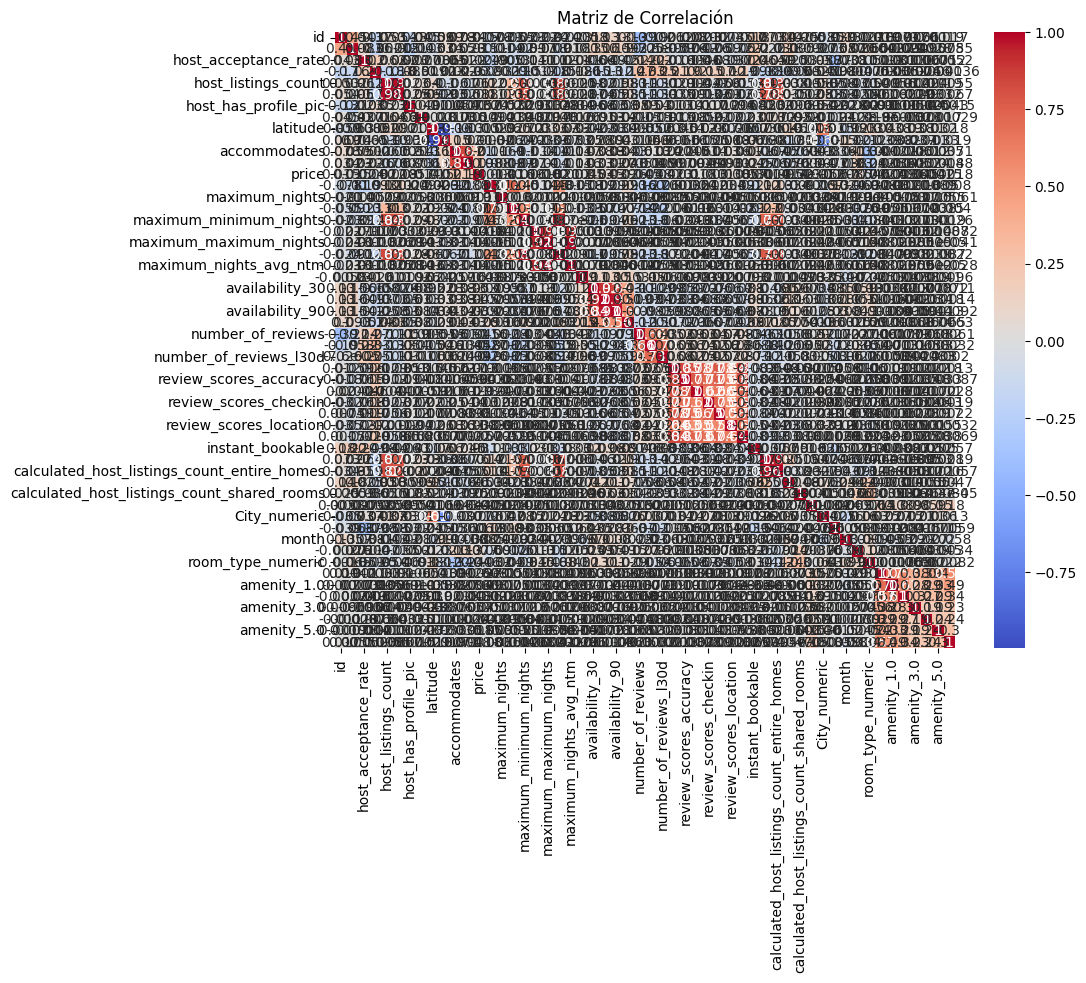

<ipython-input-32-b27605e5303a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_superhost.index, y=correlation_with_superhost.values, palette='coolwarm')


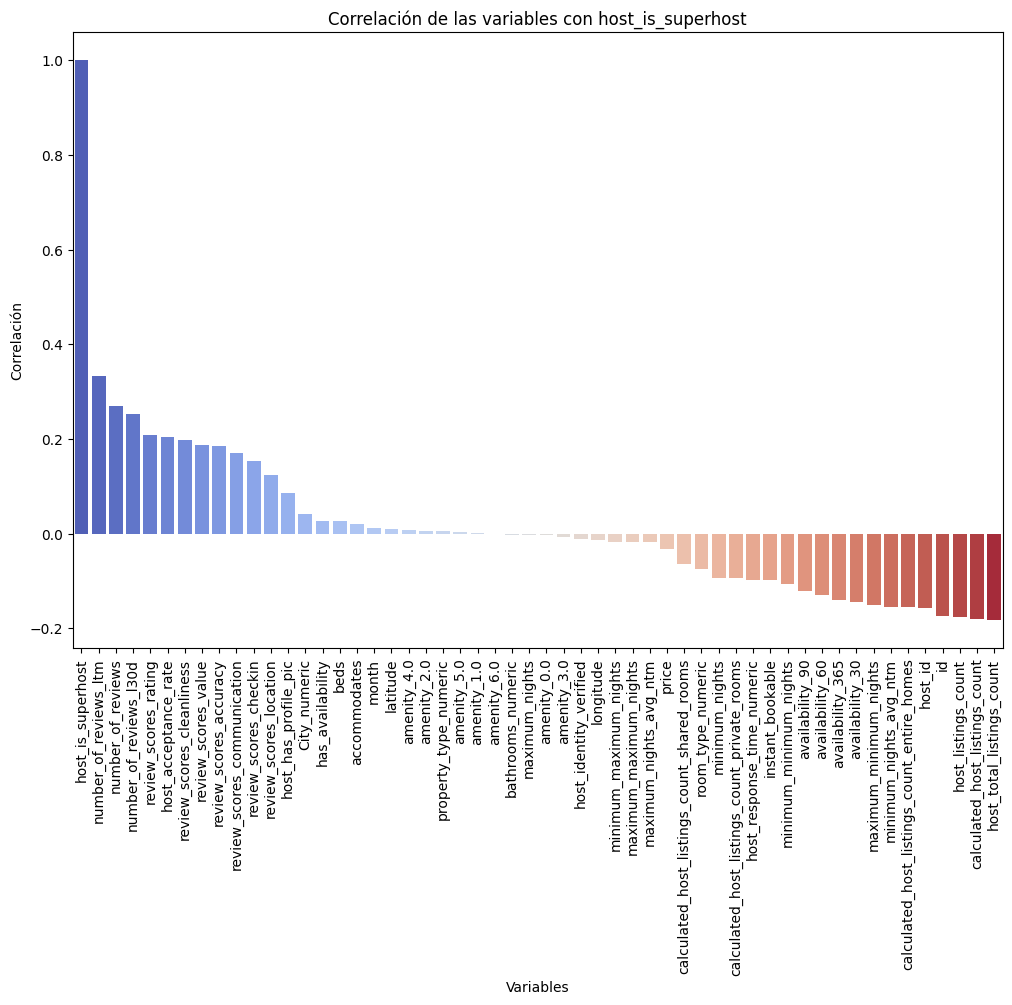

In [ ]:
# Supongamos que ya hemos cargado y preparado los datos en el DataFrame `data`

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Filtrar la correlación con respecto a 'host_is_superhost'
correlation_with_superhost = correlation_matrix['host_is_superhost'].sort_values(ascending=False)

# Mostrar las correlaciones
print("Correlación de todas las variables con 'host_is_superhost':")
print(correlation_with_superhost)

# Opcional: Visualizar la matriz de correlación como un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

# Visualizar la correlación con 'host_is_superhost'
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_superhost.index, y=correlation_with_superhost.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlación de las variables con host_is_superhost')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.show()


Tratamos el resto de variables categóricas faltantes como dummies

In [ ]:
# Identificar variables categóricas
categorical_columns = ['City_numeric', 'host_response_time_numeric', 'property_type_numeric', 'room_type_numeric']

# Crear variables dummy para las variables categóricas
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Convertir todas las columnas booleanas a valores numéricos
data = data.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Convertir todas las columnas a tipos numéricos y manejar errores
data = data.apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores NaN
data.dropna(inplace=True)

# Verificar que no queden columnas con dtype object
print(data.dtypes)

# Separar las características (X) y la etiqueta (y)
X = data.drop('host_is_superhost', axis=1)
y = data['host_is_superhost']








id                             int64
host_id                        int64
host_acceptance_rate         float64
host_is_superhost            float64
host_listings_count          float64
                              ...   
property_type_numeric_122      int64
property_type_numeric_123      int64
room_type_numeric_1            int64
room_type_numeric_2            int64
room_type_numeric_3            int64
Length: 177, dtype: object


## Desarrollo del modelo y evaluación del modelo

En este estudio se desarrolló un modelo para predecir si un anfitrión en Airbnb puede ser clasificado como "superhost". Se enfrentó un problema llamado multicolinealidad, donde muchas variables están tan relacionadas entre sí que complican la interpretación de los resultados del modelo.

###Uso del Análisis de Componentes Principales (PCA)
Para resolver este problema, se usó una técnica estadística conocida como Análisis de Componentes Principales (PCA). El primer paso fue normalizar los datos, es decir, ajustar todas las variables para que tengan la misma escala de importancia. Esto es crucial porque el PCA puede ser afectado si una variable domina sobre las demás por su escala de medida.

Después de normalizar los datos, se aplicó PCA para transformar las variables originales en un nuevo conjunto de variables que no están relacionadas entre sí. Estas nuevas variables, o componentes principales, capturan la información más importante de los datos originales.

###Selección de Componentes
El siguiente paso fue decidir cuántos de estos nuevos componentes utilizar para el modelo. Se eligió conservar los componentes que juntos explicaban al menos el 65% de la variabilidad de los datos originales, lo que ayuda a mantener la mayoría de la información importante mientras se reduce el número de variables.

###Construcción y Evaluación del Modelo
Utilizando estos componentes seleccionados, se dividió el conjunto de datos en dos partes: una para entrenar el modelo y otra para probarlo. Esto es importante para asegurarse de que el modelo funciona bien no solo con los datos con los que se creó, sino también con nuevos datos.

Se utilizó un modelo de regresión logística, que es adecuado para predecir resultados que son de tipo sí/no, como es el caso de ser o no "superhost".

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determinar el número de componentes que explican el 95% de la varianza
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.65) + 1

# Reducir los datos a n_components
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.3, random_state=42)

In [ ]:
# Ajustar un modelo de regresión logística
X_train_const = sm.add_constant(X_train)  # Añadir una constante
logit_model = sm.Logit(y_train, X_train_const).fit()

# Evaluar el modelo
X_test_const = sm.add_constant(X_test)  # Añadir una constante
y_pred = logit_model.predict(X_test_const)
y_pred_class = (y_pred > 0.5).astype(int)

# Mostrar el resumen del modelo
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.522957
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:      host_is_superhost   No. Observations:               122497
Model:                          Logit   Df Residuals:                   122410
Method:                           MLE   Df Model:                           86
Date:                Sun, 19 May 2024   Pseudo R-squ.:                  0.2352
Time:                        18:17:52   Log-Likelihood:                -64061.
converged:                       True   LL-Null:                       -83767.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6142      0.010    -64.647      0.000      -0.633      -0.596
x1            -0.6381      0.

###P-Valor (P>|z|):

Proporciona la probabilidad de obtener un valor Z como el observado si la variable correspondiente no tuviera efecto alguno (hipótesis nula). Un p-valor bajo (0.05) indica que podemos rechazar la hipótesis nula y considerar la variable como significativa en el modelo.


Muchas de las variables muestran p-valores menores a 0.05, indicando que contribuyen significativamente al modelo. Por ejemplo, x1, x2, x5, etc., son significativas, mientras que otras como x30, x37, x39 no lo son y podrían considerarse para ser eliminadas del modelo.

###Pseudo R-cuadrado (Pseudo R-sq.):
El valor de 0.2366 indica una razonable capacidad del modelo para explicar la variabilidad en el estatus de superhost, aunque hay espacio para mejorar este ajuste.

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Suponemos que las variables significativas están en las columnas 1, 2, y 4
indices_significativos = [1, 2, 4]
X_train_reduced = X_train[:, indices_significativos]
X_test_reduced = X_test[:, indices_significativos]

# Ajustar un nuevo modelo de regresión logística solo con variables significativas
X_train_reduced_const = sm.add_constant(X_train_reduced)  # Añadir una constante
logit_model_reduced = sm.Logit(y_train, X_train_reduced_const).fit()

# Evaluar el modelo reducido
X_test_reduced_const = sm.add_constant(X_test_reduced)  # Añadir una constante
y_pred_reduced = logit_model_reduced.predict(X_test_reduced_const)
y_pred_reduced_class = (y_pred_reduced > 0.5).astype(int)

# Mostrar el resumen del modelo reducido
print(logit_model_reduced.summary())


Optimization terminated successfully.
         Current function value: 0.666384
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:      host_is_superhost   No. Observations:               122497
Model:                          Logit   Df Residuals:                   122493
Method:                           MLE   Df Model:                            3
Date:                Sun, 19 May 2024   Pseudo R-squ.:                 0.02551
Time:                        18:17:53   Log-Likelihood:                -81630.
converged:                       True   LL-Null:                       -83767.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2919      0.006    -49.539      0.000      -0.303      -0.280
x1            -0.1779      0.

In [ ]:
# Calcular la tasa de error
error_rate = np.mean(y_pred_class != y_test)
print(f"Tasa de error: {error_rate}")

Tasa de error: 0.2637333333333333


Una tasa de error del 26.37% puede considerarse bastante buena dependiendo del contexto y la complejidad del problema. Si consideramos que predecir si alguien es un superhost involucra numerosos factores y variables, un error del 26.48% podría indicar un modelo razonablemente efectivo.